Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 READ DATA SET

In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/data.csv"

df = pd.read_csv(file_path)

print("Dataset Loaded ")
print(df.head())   # first 5 rows
print(df.columns)  # column names


Dataset Loaded 
         v1        v2        v4        v5        v6        v7        v8  \
0 -0.086499  0.118481 -0.020758  0.095467  0.190517  0.208278  0.241206   
1 -0.143792  0.118248 -0.024002  0.096716  0.195705 -0.037052  0.247957   
2 -0.046082  0.116383 -0.027310  0.096336  0.198608 -0.952059  0.249096   
3  0.505901  0.115519 -0.029270  0.094960  0.199608 -1.551264  0.249888   

         v9       v10       v11  ...      v121      v122      v123      v124  \
0  0.086143  1.028661  0.030129  ... -0.057883 -0.056169 -0.176036 -0.006008   
1 -0.045954  1.397293 -0.448406  ... -0.097860  0.036463 -0.179789 -0.004218   
2 -0.288465  1.752338 -2.257338  ... -0.152036  0.216293 -0.182619 -0.004127   
3 -0.759906  2.112311 -4.498549  ... -0.656708  0.573906 -0.183422 -0.004377   

       v126      v127      v128      v129      v130      v131  
0 -0.109106 -0.041362  0.054588  0.188594 -0.094775 -0.023729  
1 -0.339203 -0.182611  0.064515  0.188534 -0.122304 -0.028937  
2 -0.501772 -0.

 Checking Missing Value

In [3]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 v1      0
v2      0
v4      0
v5      0
v6      0
       ..
v127    0
v128    0
v129    0
v130    0
v131    0
Length: 112, dtype: int64


 Filling Miss value

In [4]:
# Numeric → median se fill
df = df.fillna(df.median(numeric_only=True))

# Categorical → mode se fill
df = df.fillna(df.mode().iloc[0])


Relation with target value

Correlation with Target:
 v131    1.000000
v16     0.996696
v78     0.988409
v41     0.611536
v33     0.558051
          ...   
v83    -0.544267
v129   -0.579019
v62    -0.592624
v69    -0.938338
v115   -0.948928
Name: v131, Length: 112, dtype: float64


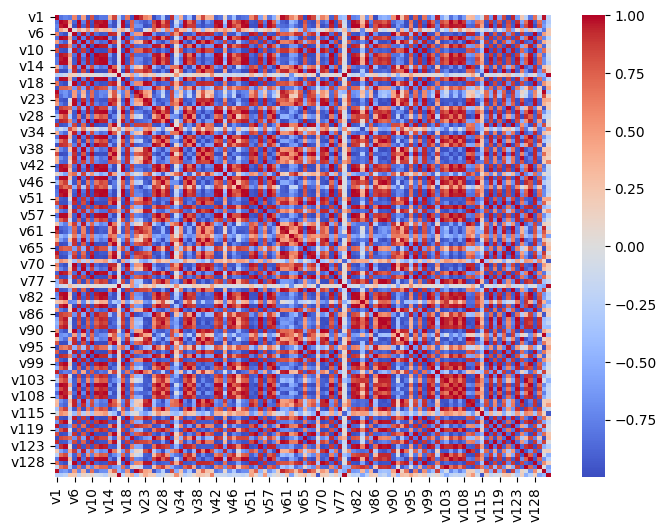

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

target = df.columns[-1]

correlation = df.corr()[target].sort_values(ascending=False)
print("Correlation with Target:\n", correlation)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.show()


Data Visualization

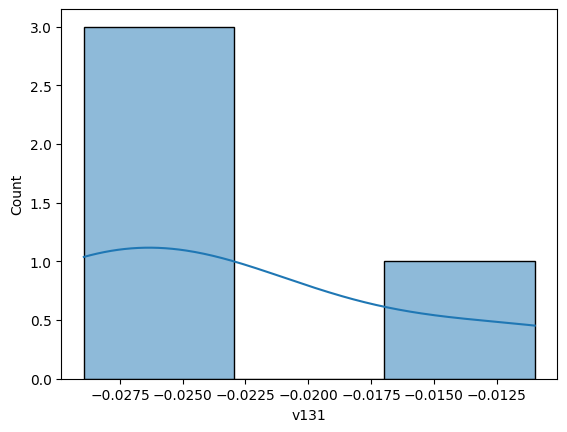

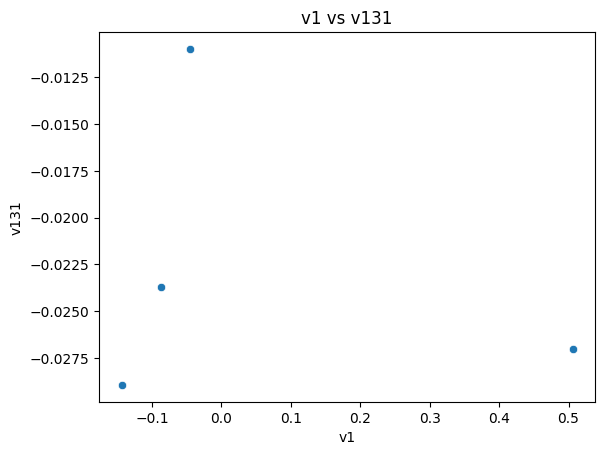

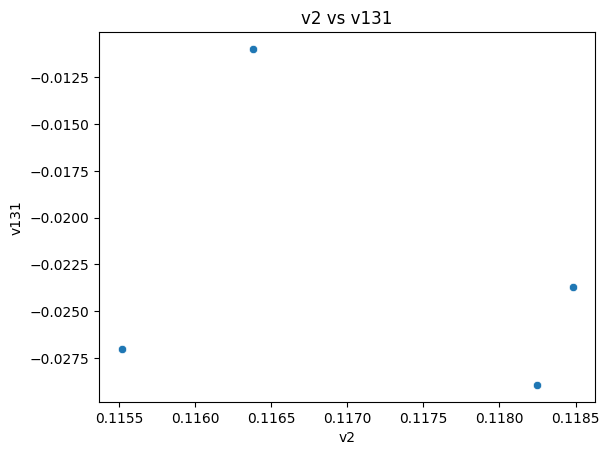

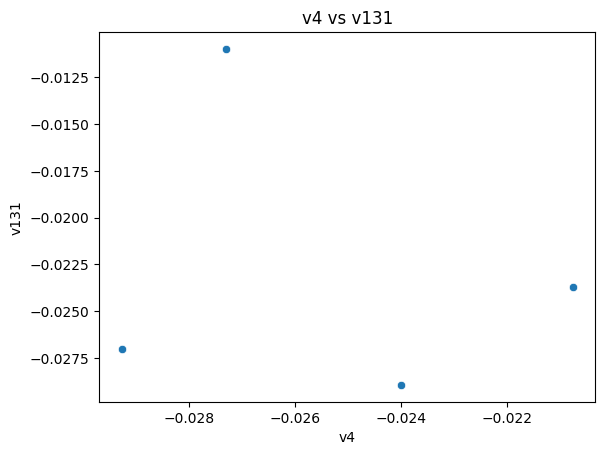

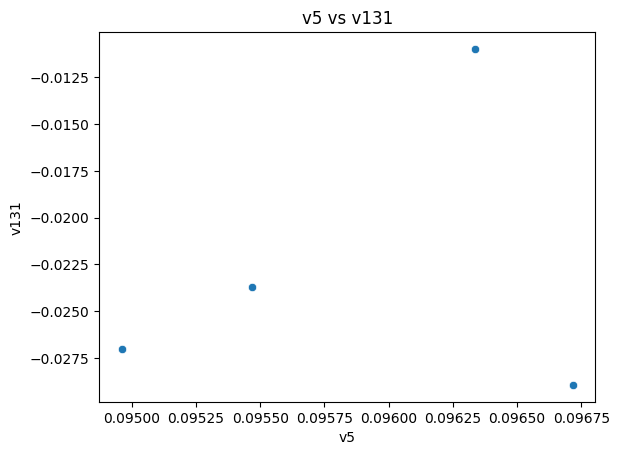

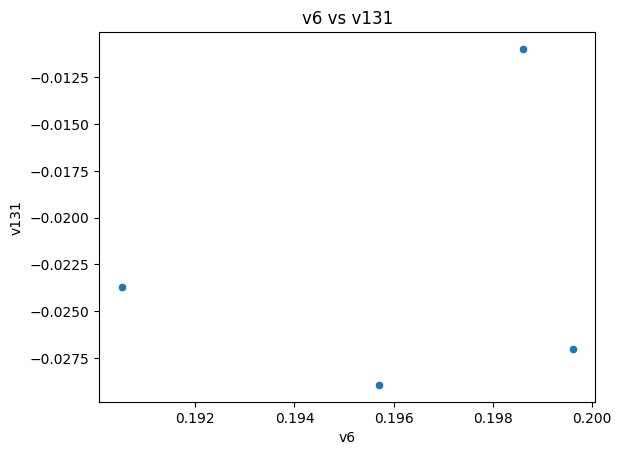

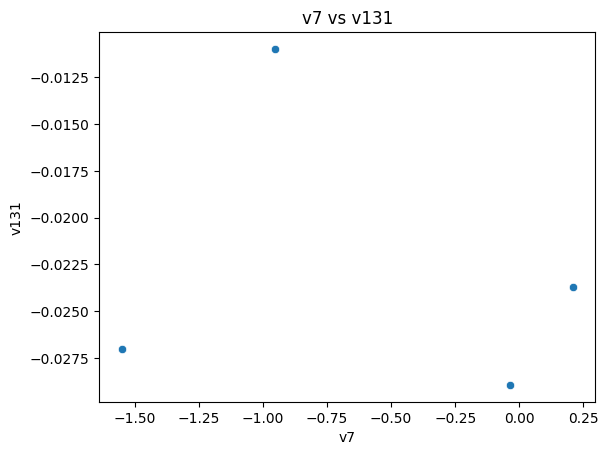

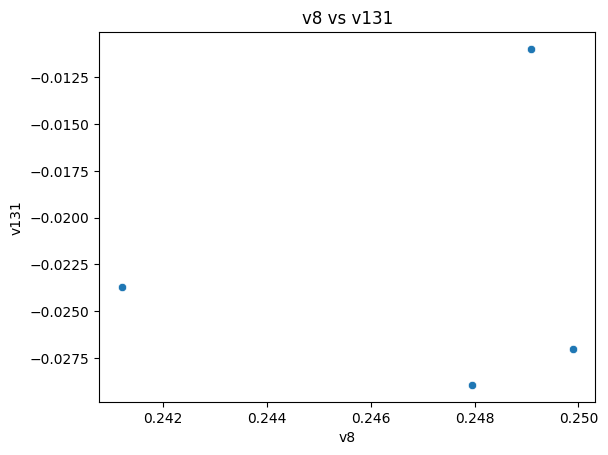

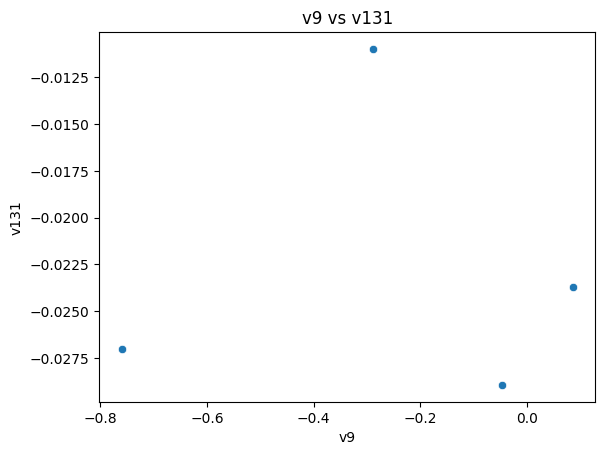

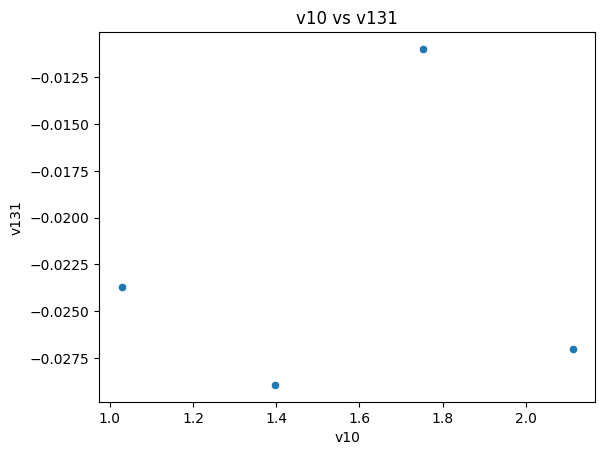

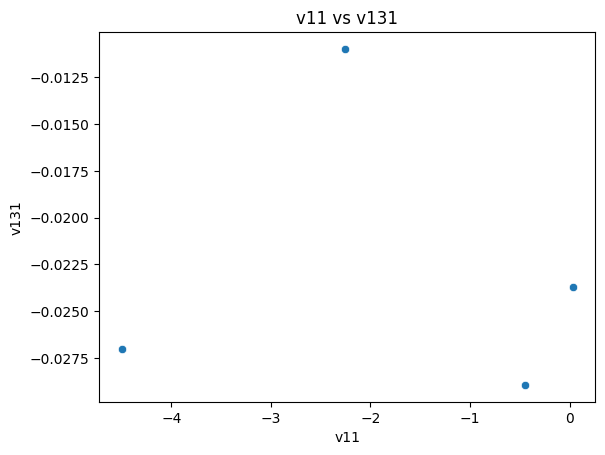

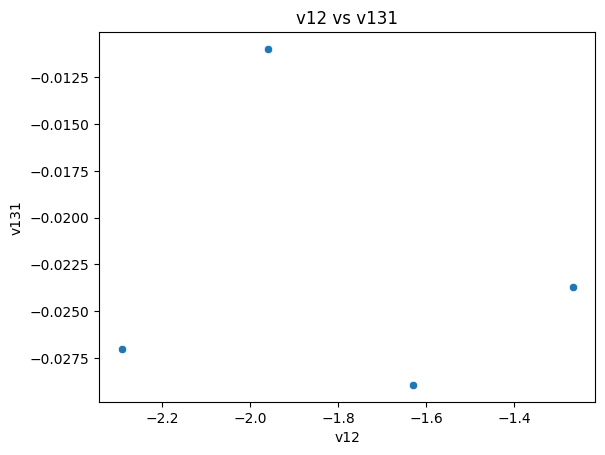

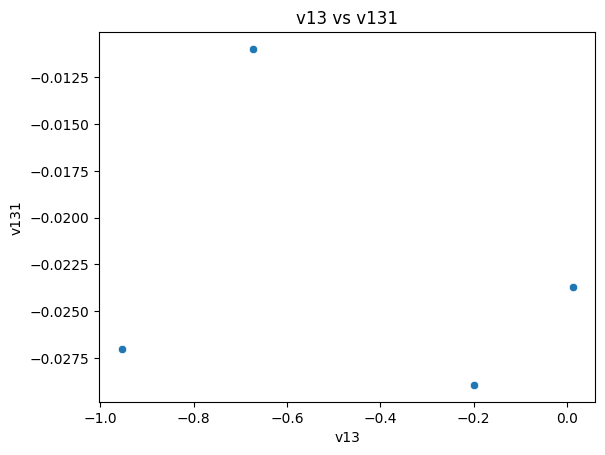

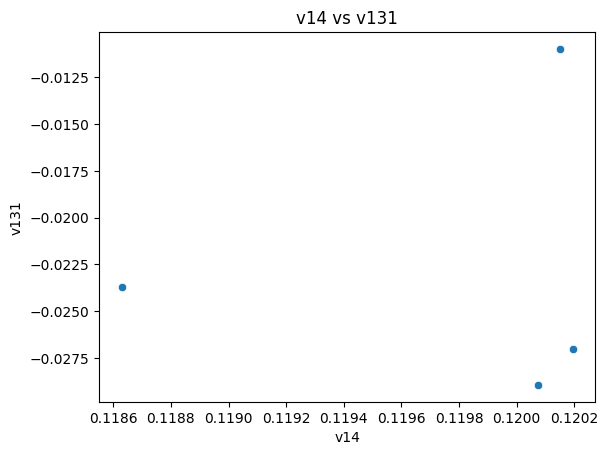

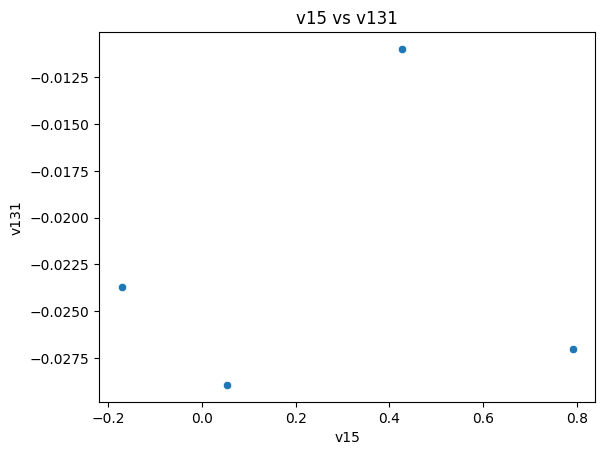

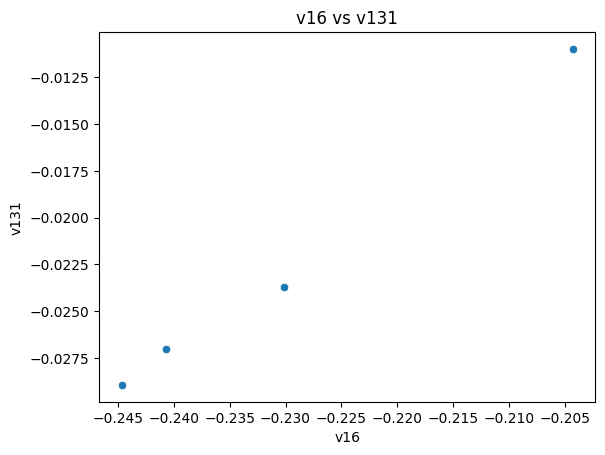

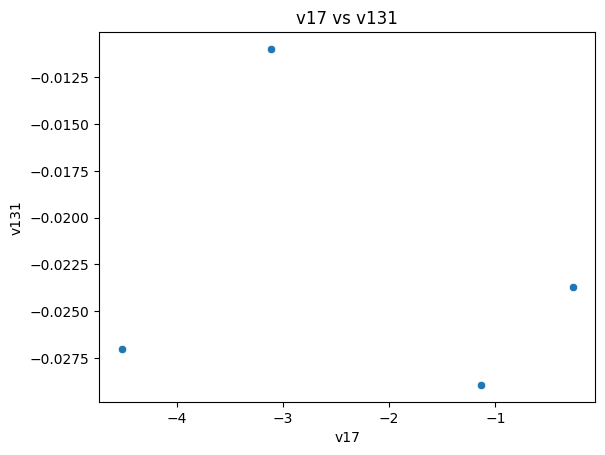

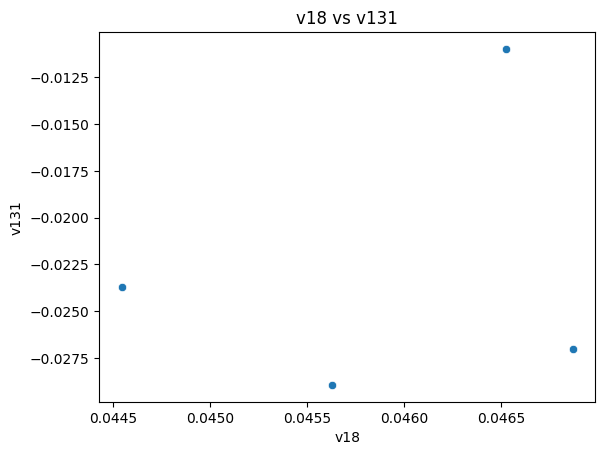

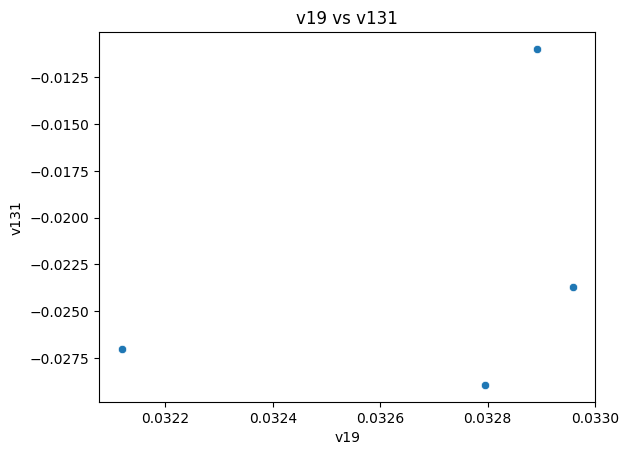

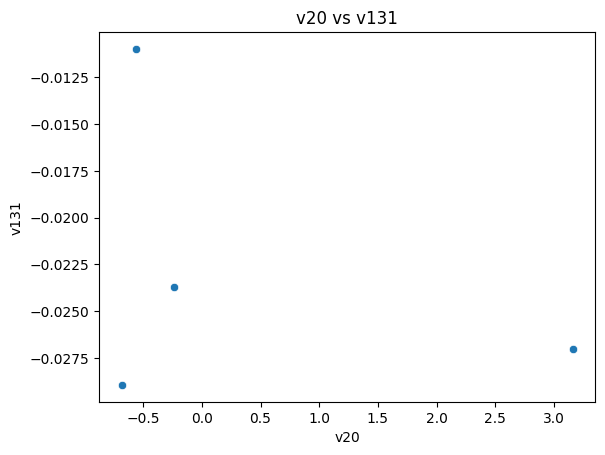

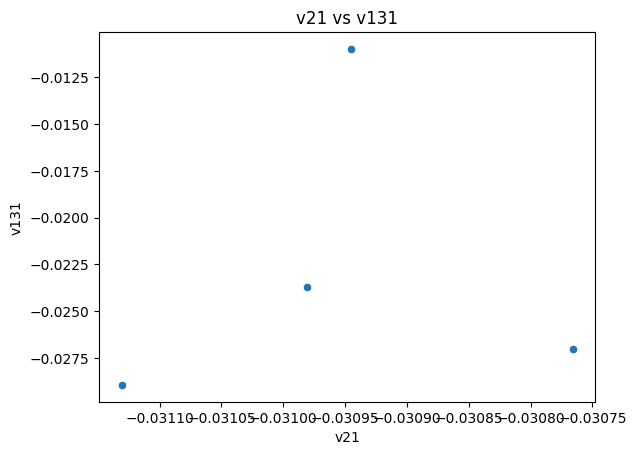

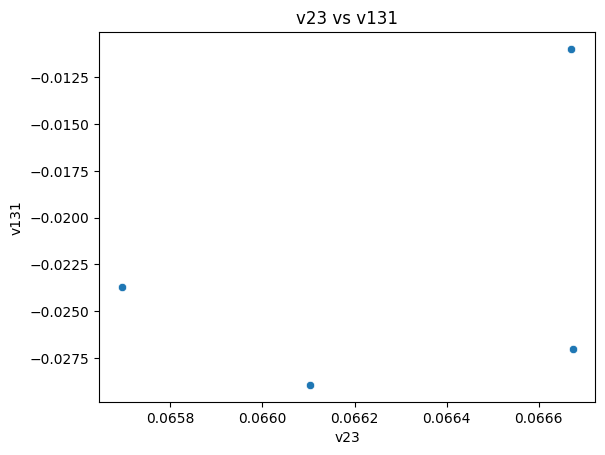

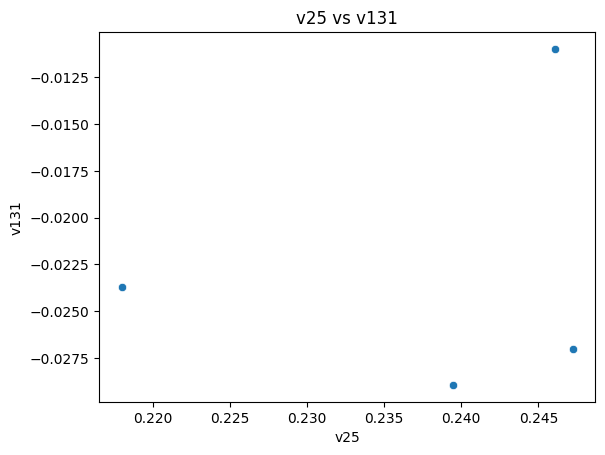

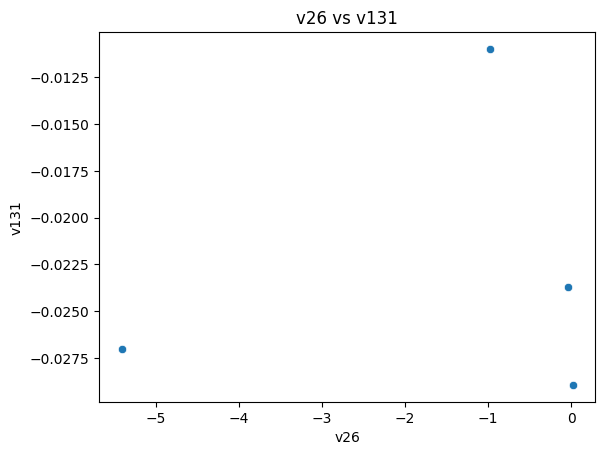

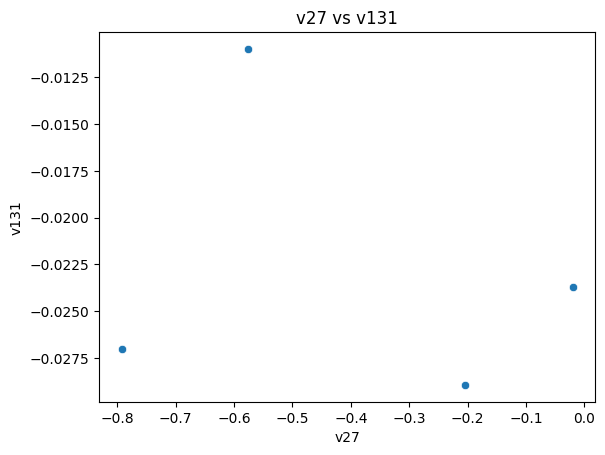

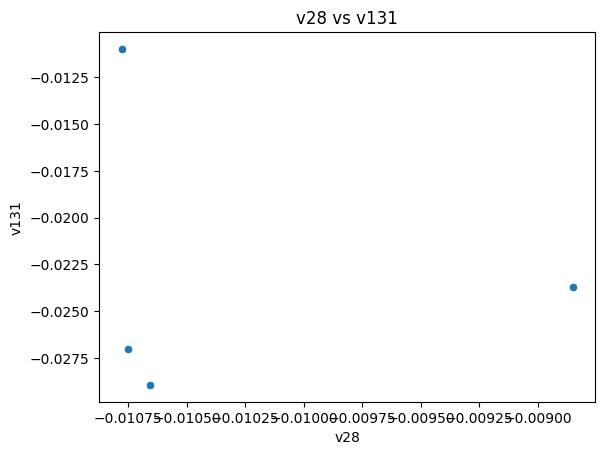

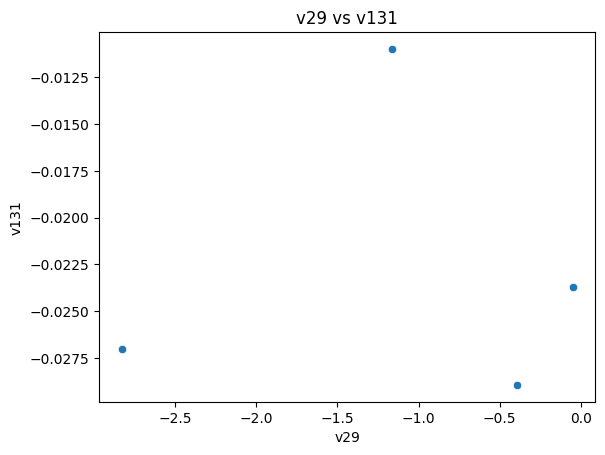

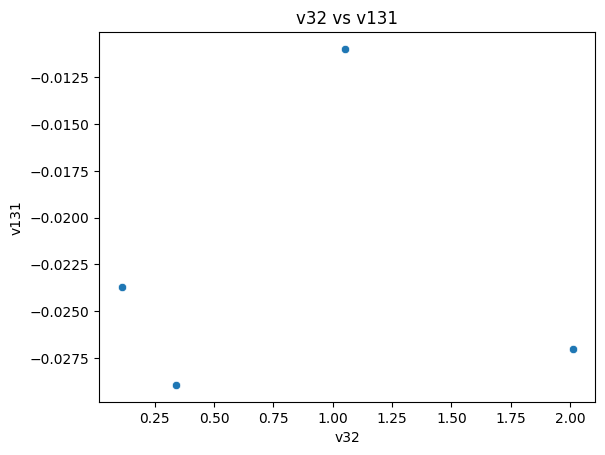

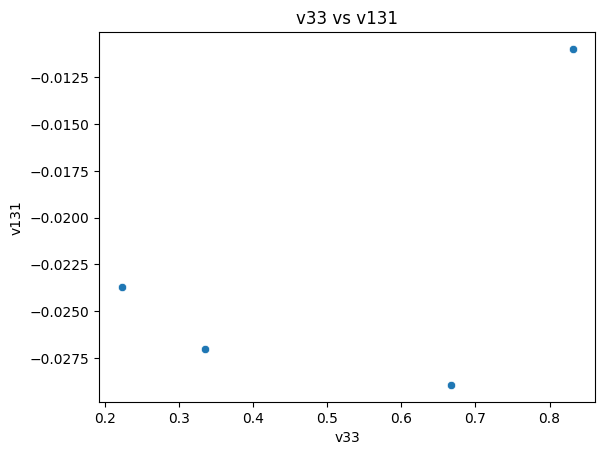

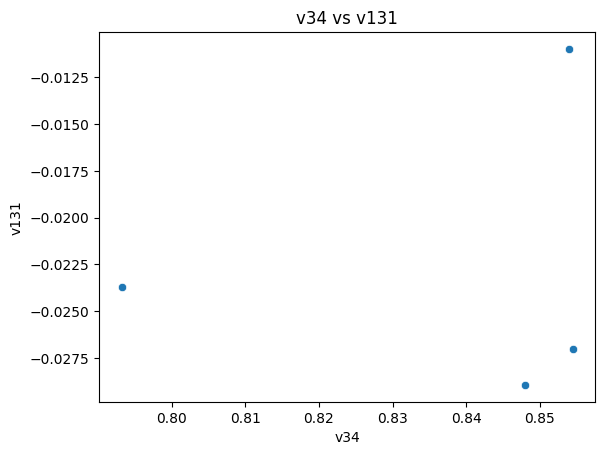

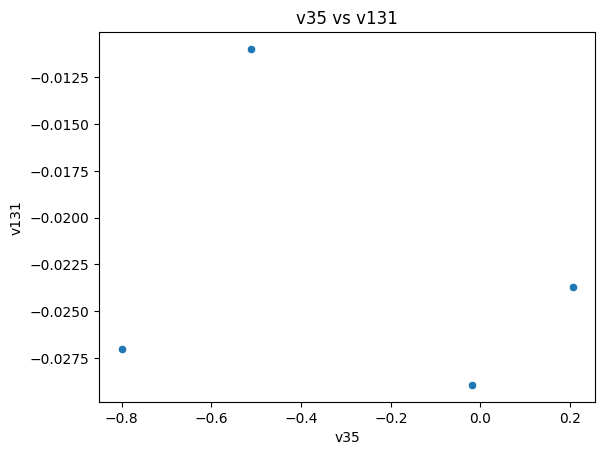

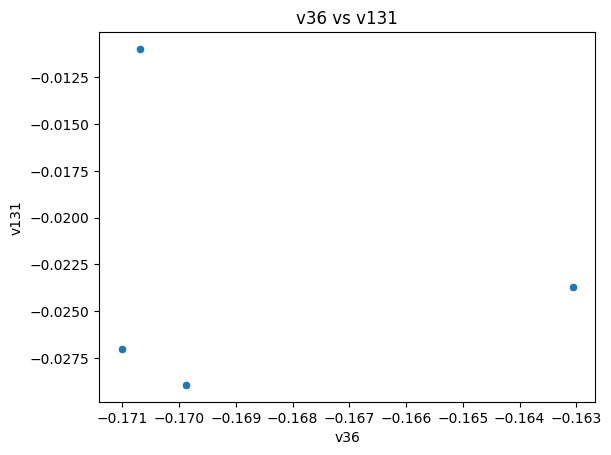

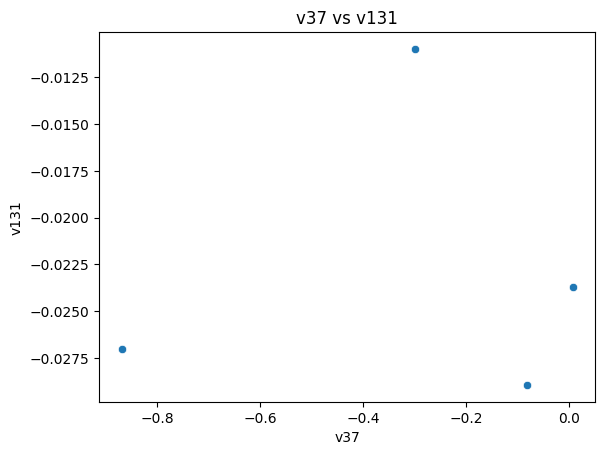

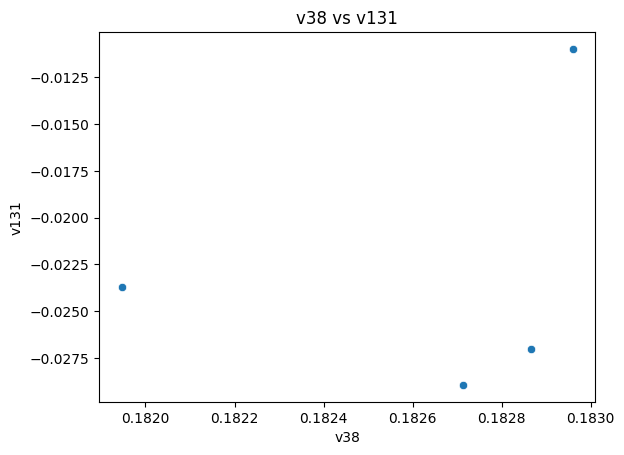

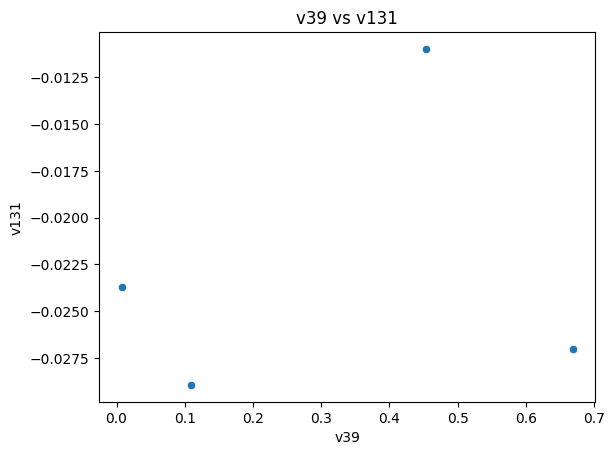

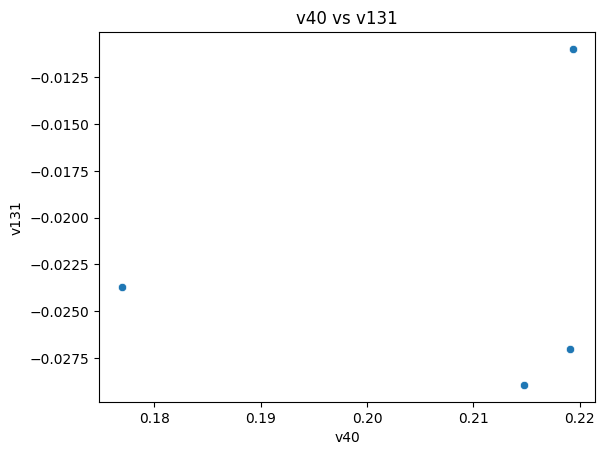

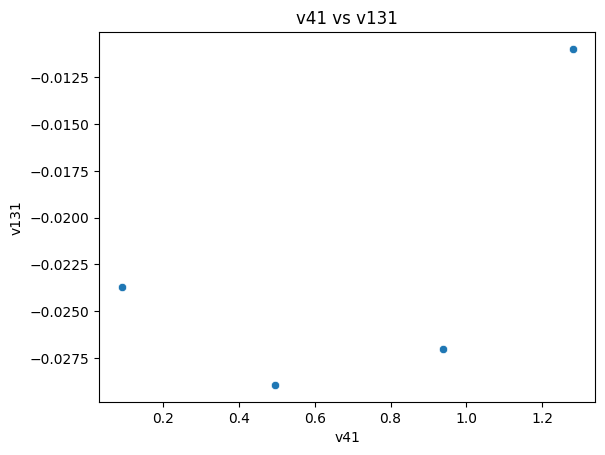

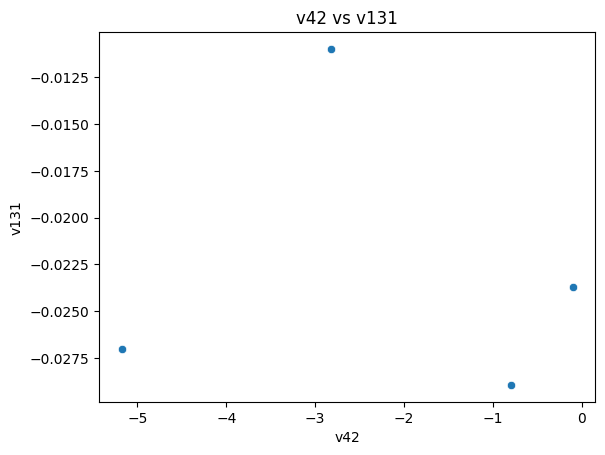

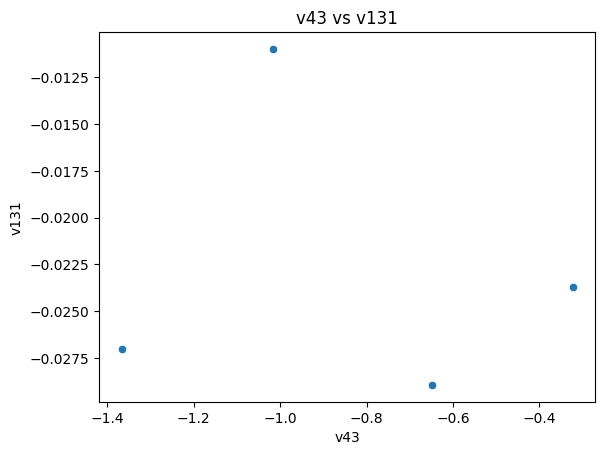

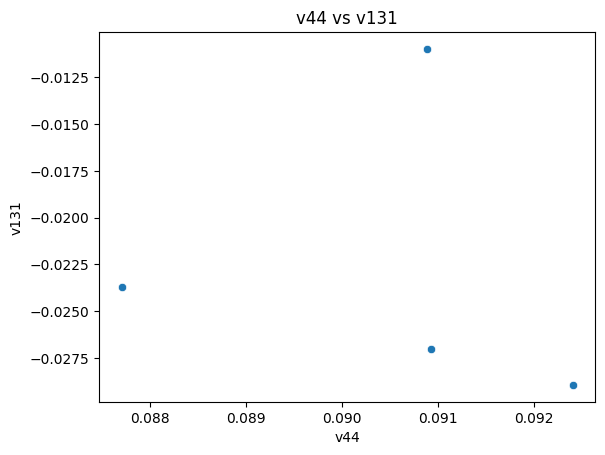

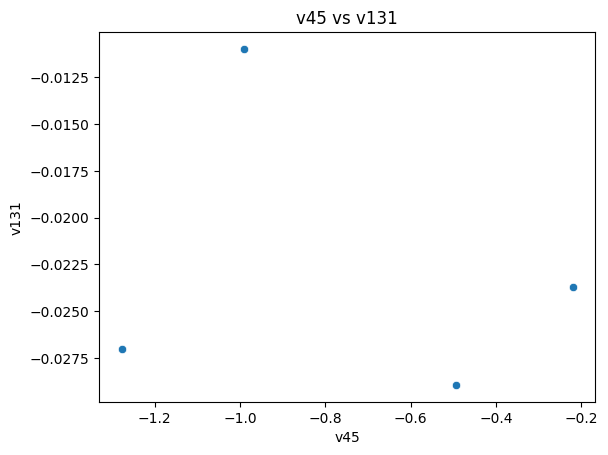

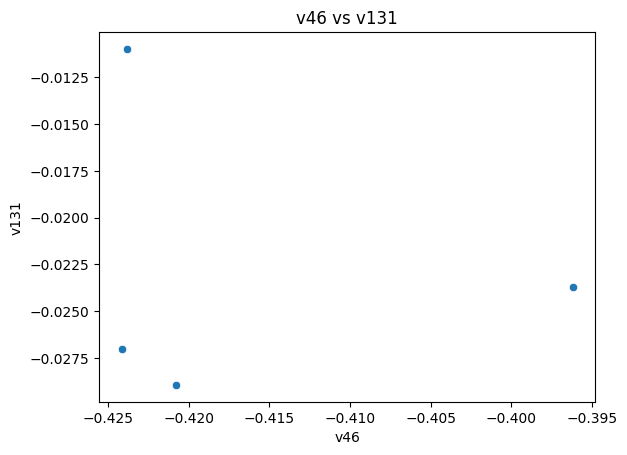

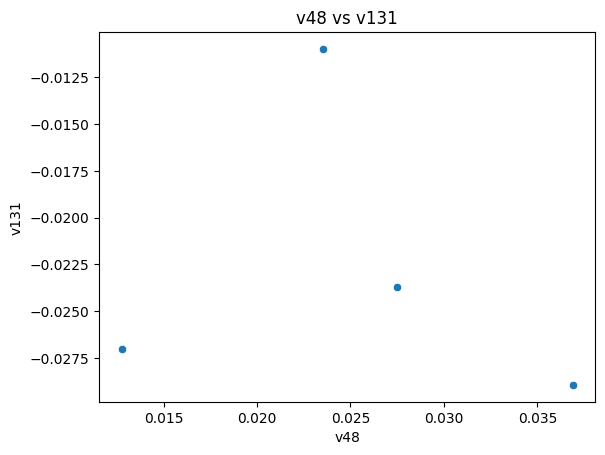

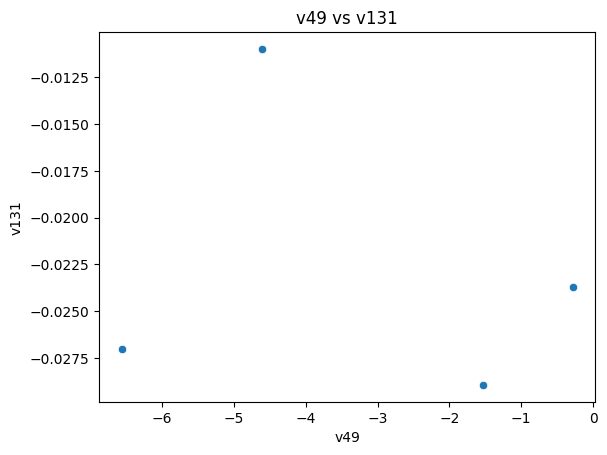

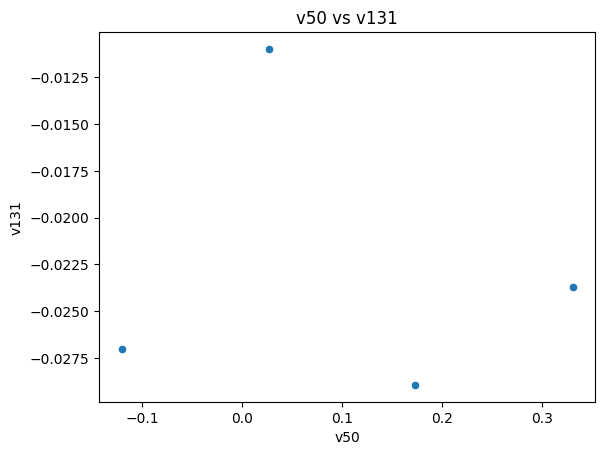

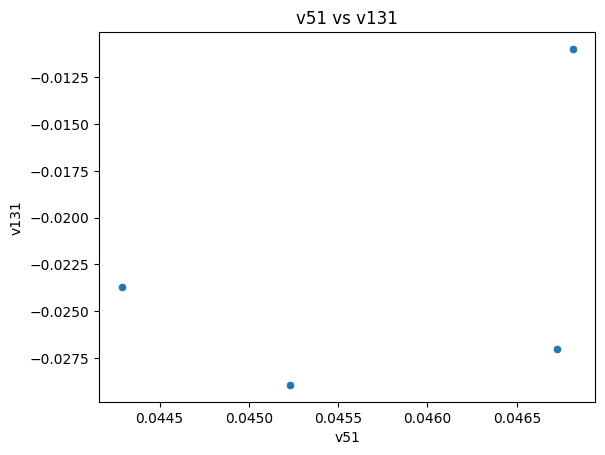

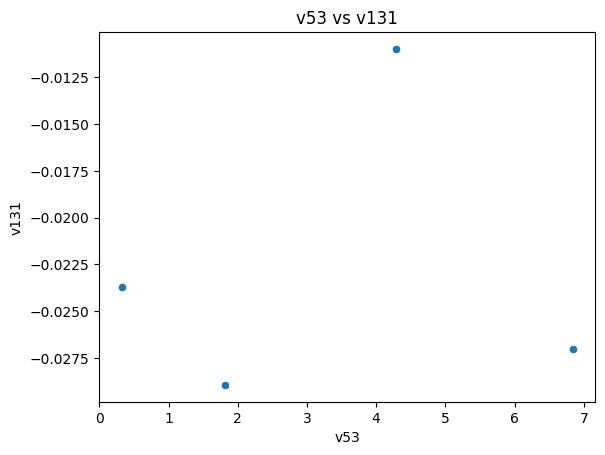

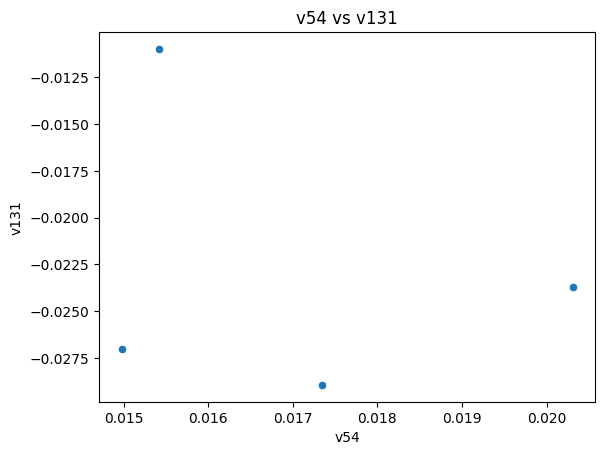

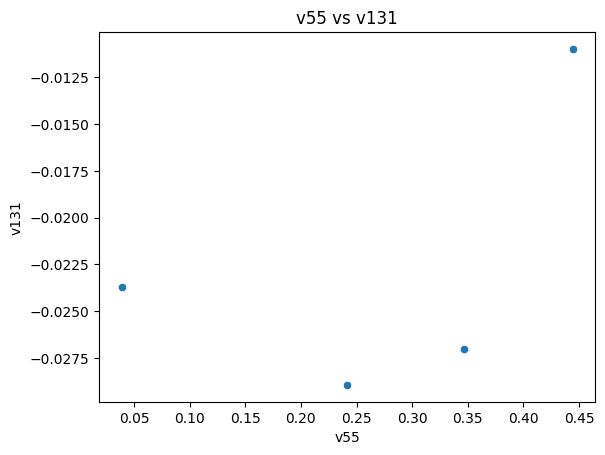

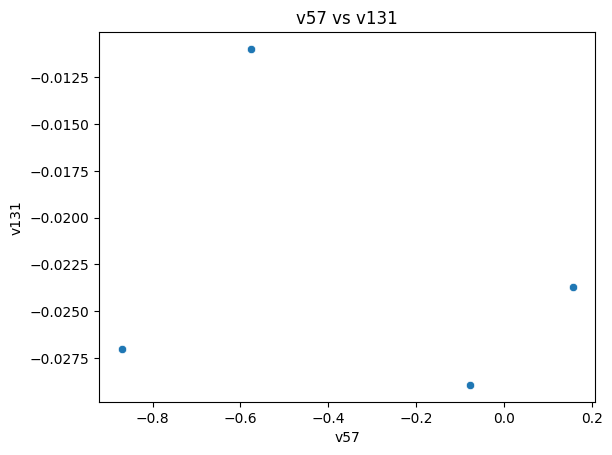

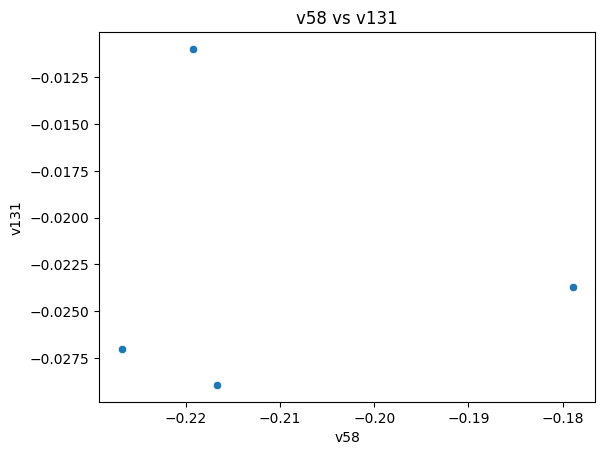

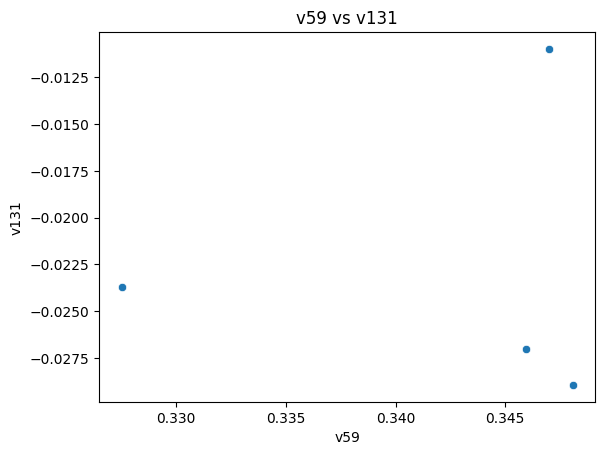

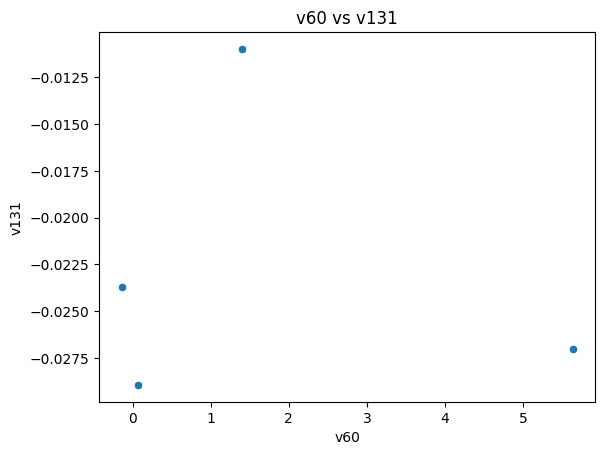

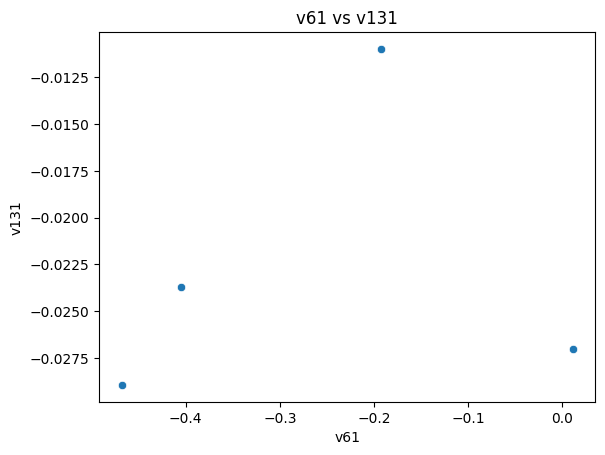

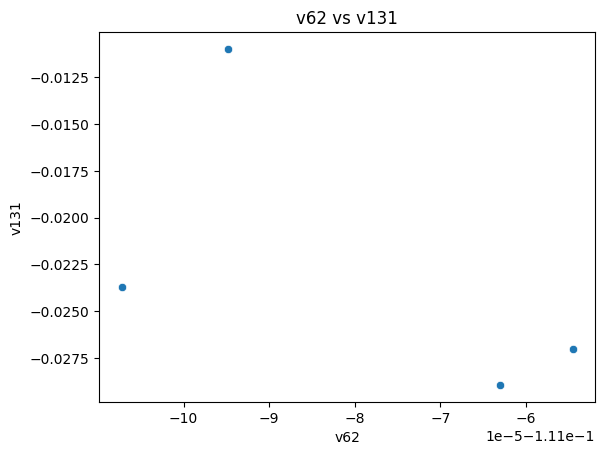

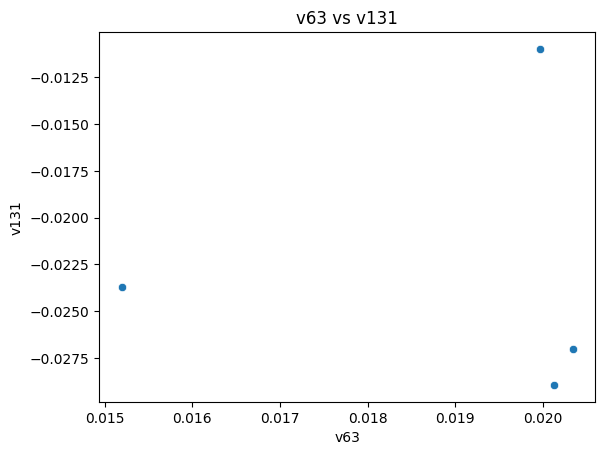

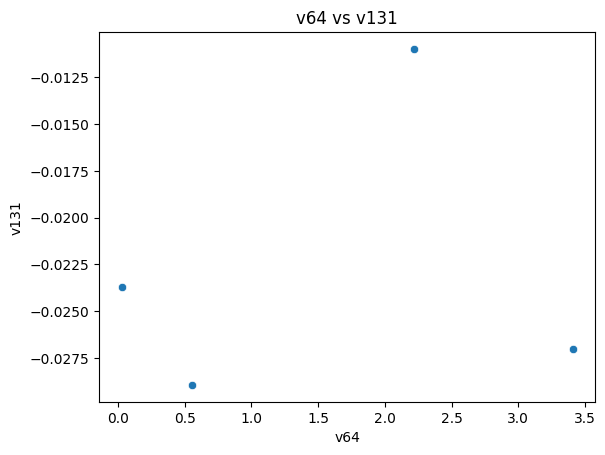

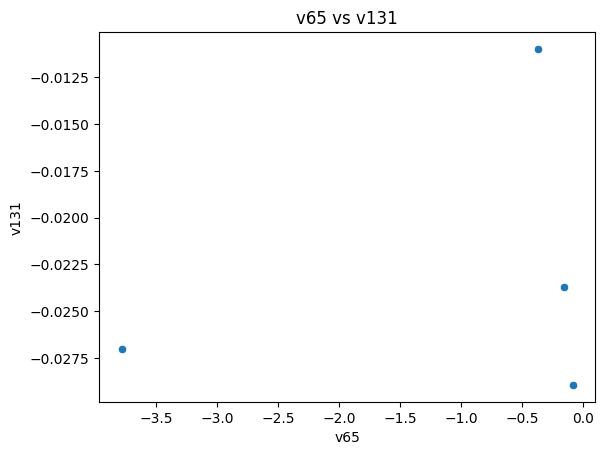

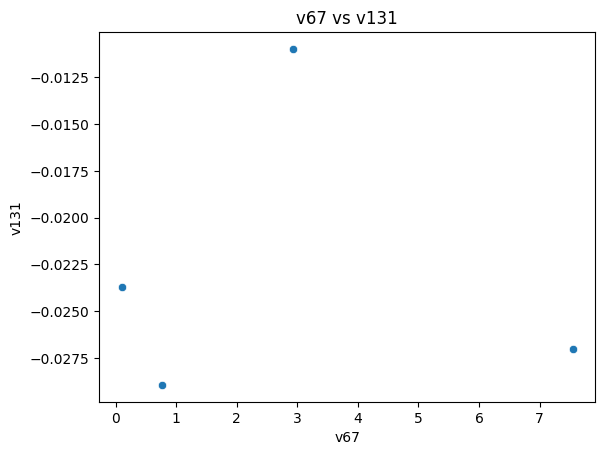

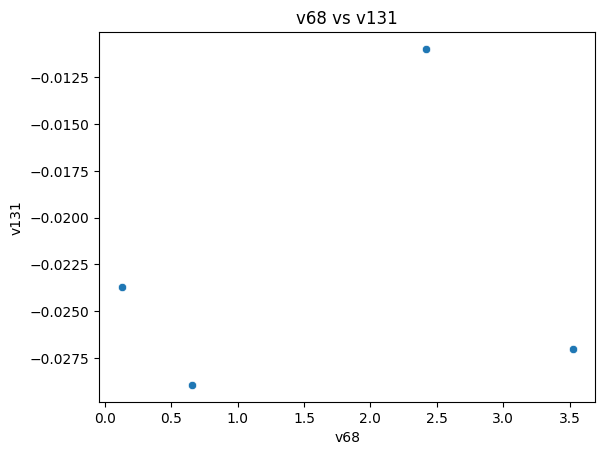

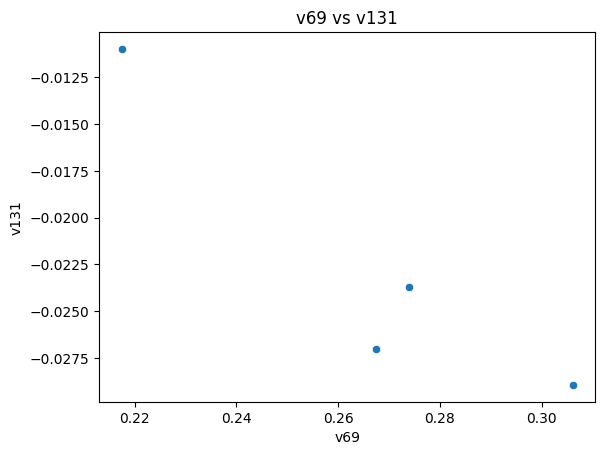

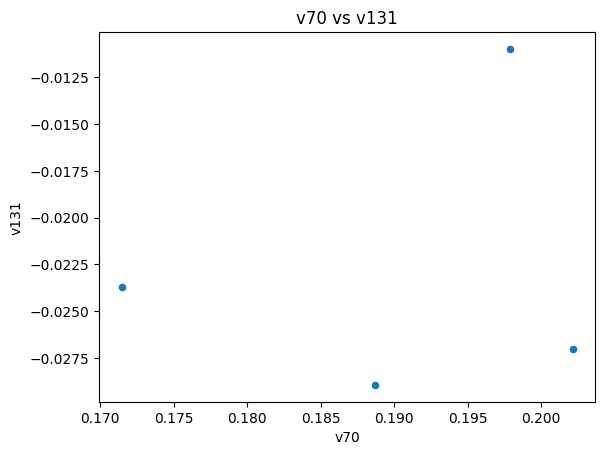

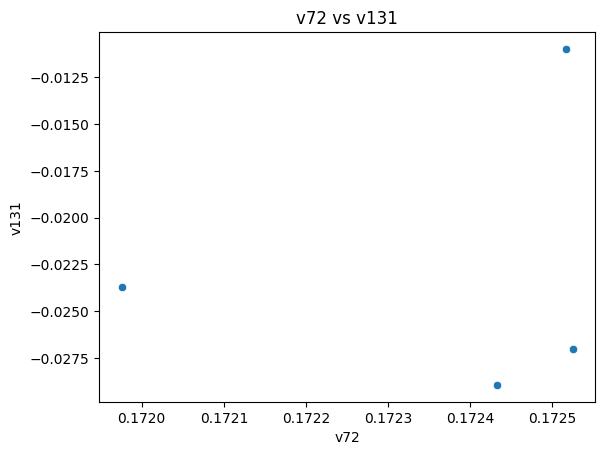

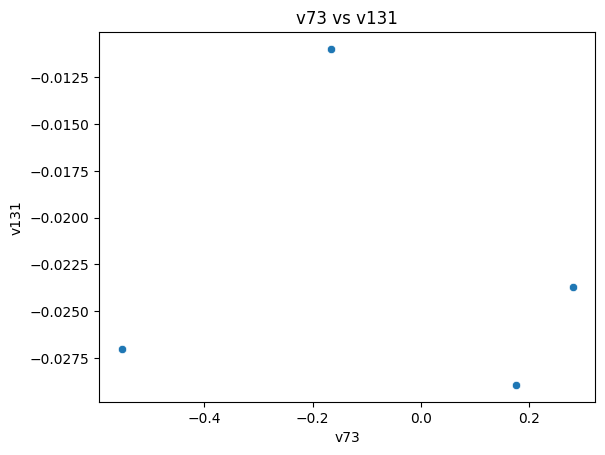

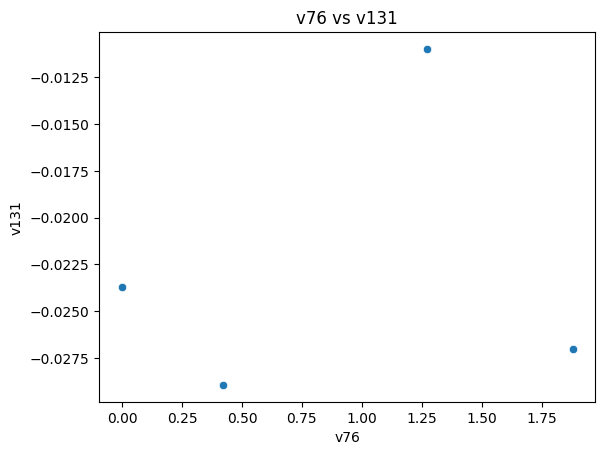

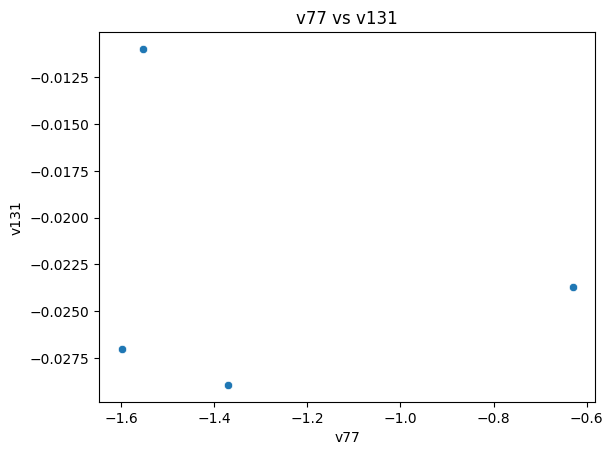

KeyboardInterrupt: 

In [6]:
# Target distribution
sns.histplot(df[target], kde=True)
plt.show()

# Features vs Target scatter
for col in df.columns[:-1]:
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.show()


Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]   # features
y = df.iloc[:, -1]    # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Evaluation

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score (Accuracy):", r2)


Mean Squared Error: 0.00011432556252782047
R2 Score (Accuracy): nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


 Saving Output in drive


In [10]:
output_path = "/content/drive/MyDrive/model_results.txt"

with open(output_path, "w") as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"R2 Score: {r2}\n")

print("Results saved in Drive :", output_path)


Results saved in Drive : /content/drive/MyDrive/model_results.txt
